# Beer and Wine Sales Prediction With Facebook's Prophet Library

**Caleb Pitts** <br>
**Udemy Inspired by Time Series Analysis Course Project** <br>
**10/13/19**

In [1]:
import pandas as pd
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("/Users/CalebPitts/Documents/Files/Projects/BeerWineSalesPrediction/BeerWineLiquor.csv")

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
ds    324 non-null datetime64[ns]
y     324 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.1 KB


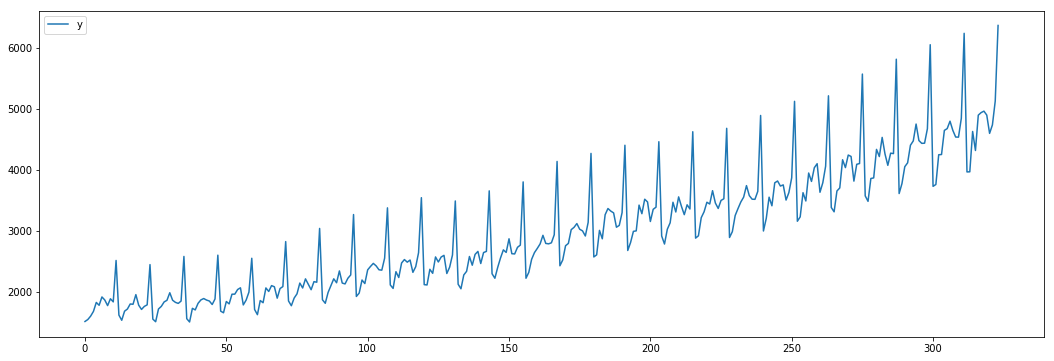

In [ ]:
df.plot(y='y',figsize=(18,6))

## Training Prophet Model

In [ ]:
forecast_horizon = 12  # in months

In [ ]:
split = df.shape[0] - forecast_horizon

In [ ]:
train = df.iloc[:split]
test = df.iloc[split:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=forecast_horizon,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1773.446865,1163.468400,1488.202561,1773.446865,1773.446865,-451.355954,-451.355954,-451.355954,-451.355954,-451.355954,-451.355954,0.0,0.0,0.0,1322.090911
1,1992-02-01,1776.269428,1204.966602,1516.336353,1776.269428,1776.269428,-416.575309,-416.575309,-416.575309,-416.575309,-416.575309,-416.575309,0.0,0.0,0.0,1359.694119
2,1992-03-01,1778.909891,1440.691312,1752.483137,1778.909891,1778.909891,-183.601718,-183.601718,-183.601718,-183.601718,-183.601718,-183.601718,0.0,0.0,0.0,1595.308172
3,1992-04-01,1781.732454,1443.661382,1733.178132,1781.732454,1781.732454,-194.735533,-194.735533,-194.735533,-194.735533,-194.735533,-194.735533,0.0,0.0,0.0,1586.996921
4,1992-05-01,1784.463967,1674.369514,1994.901854,1784.463967,1784.463967,44.481668,44.481668,44.481668,44.481668,44.481668,44.481668,0.0,0.0,0.0,1828.945636


In [ ]:
forecast.shape

(324, 16)

In [ ]:
ax = forecast.plot(y='yhat',label='Forecasted',legend=True,figsize=(12,8))
test.plot(y='y',label='Actual Sales',legend=True,ax=ax, xlim=(len(df)-forecast_horizon, len(df)))
plt.xlabel("Time series periods")
plt.ylabel("Sales");

In [ ]:
print("RMSE:", round(rmse(forecast["yhat"].tail(forecast_horizon), test["y"]), 2))
print("Average Sales Volume:", round(test.mean().values[0], 2))

## Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# Initial 3 years training period
initial = 3 * 365
initial = str(initial) + ' days'
# Fold every 3 years
period = 3 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [ ]:
df_cv.head()

In [ ]:
performance_metrics(df_cv).head()

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape');

Generally, the model performs very well with a forecast horizon between 100 and 350 days. Prophet is very nice here because it does a good job of telling me how well the model performs when feeding it varying degrees of forecast horizons. 